![image](https://github.com/user-attachments/assets/09bc4302-ab25-4ec0-971b-5732b28a5ef7)



# Day 4 - 100 Days of Data Science
**[Github Repo](https://github.com/sushant097/100Days__DataScience?tab=readme-ov-file)**

**[Kaggle Notebook](https://www.kaggle.com/code/sushant097/day4-predict-deposit-of-bank/)**

**[Dataset](https://www.kaggle.com/datasets/sushant097/bank-marketing-dataset-full/data)**

In this notebook we are going to explore banking dataset and build a machine learning model to predict whether customer will subscribe for bank deposit or not: Binary Classification. 

In [93]:
# imports
import pandas as pd # data processing/manipulation
import seaborn as sns # Visualization
import matplotlib.pyplot as plt # visualization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import numpy as np


import warnings
warnings.filterwarnings('ignore')

# Load and inspect the Dataset


Download the dataset from [here](https://www.kaggle.com/datasets/sushant097/bank-marketing-dataset-full/data).

**About Dataset:**

The attributes of dataset are:

- **age**: Age of the client (numeric)
- **job**: Type of job (categorical: "admin.", "blue-collar", "entrepreneur", etc.)
- **marital**: Marital status (categorical: "married", "single", "divorced")
- **education**: Level of education (categorical: "primary", "secondary", "tertiary", "unknown")
- **default**: Has credit in default? (categorical: "yes", "no")
- **balance**: Average yearly balance in euros (numeric)
- **housing**: Has a housing loan? (categorical: "yes", "no")
- **loan**: Has a personal loan? (categorical: "yes", "no")
- **contact**: Type of communication contact (categorical: "unknown", "telephone", "cellular")
- **day**: Last contact day of the month (numeric, 1-31)
- **month**: Last contact month of the year (categorical: "jan", "feb", "mar", ..., "dec")
- **duration**: Last contact duration in seconds (numeric)
- **campaign**: Number of contacts performed during this campaign (numeric)
- **pdays**: Number of days since the client was last contacted from a previous campaign (numeric; -1 means the client was not previously contacted)
- **previous**: Number of contacts performed before this campaign (numeric)
- **poutcome**: Outcome of the previous marketing campaign (categorical: "unknown", "other", "failure", "success")
- **y**: The target variable, whether the client subscribed to a term deposit (binary: "yes", "no")



In [94]:
data = pd.read_csv("/kaggle/input/bank-marketing-dataset-full/bank-full.csv", sep=";")

In [95]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Step 2 : Data Exploration and cleaning

In [17]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [18]:
# check if there is any null values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Descriptive Statistics:**
* Age:

    * Mean age: 40.9 years
    * Age range: 18 to 95 years
    * Standard deviation: 10.6 years
    
* Balance:

    * Mean balance: €1,362
    * Balance range: -€8,019 to €102,127
    * Standard deviation: €3,044
    
* Duration:

    * Mean call duration: 258 seconds (about 4.3 minutes)
    * Duration range: 0 to 4,918 seconds
    
* Campaign:
    * Mean number of contacts: 2.76
    * Campaign contacts range: 1 to 63
  

Great! No missing values in this dataset. 

# Analysis And Visualization:
* Univariate Analysis: We'll explore the distribution of each variable.
* Bivariate Analysis: We'll look into relationships between different variables.
* Advanced Visualizations: We'll create plots such as histograms, box plots, correlation matrices, and more.



## Univariate Analysis

Let's start with the univariate analysis, focusing on both numerical and categorical variables.

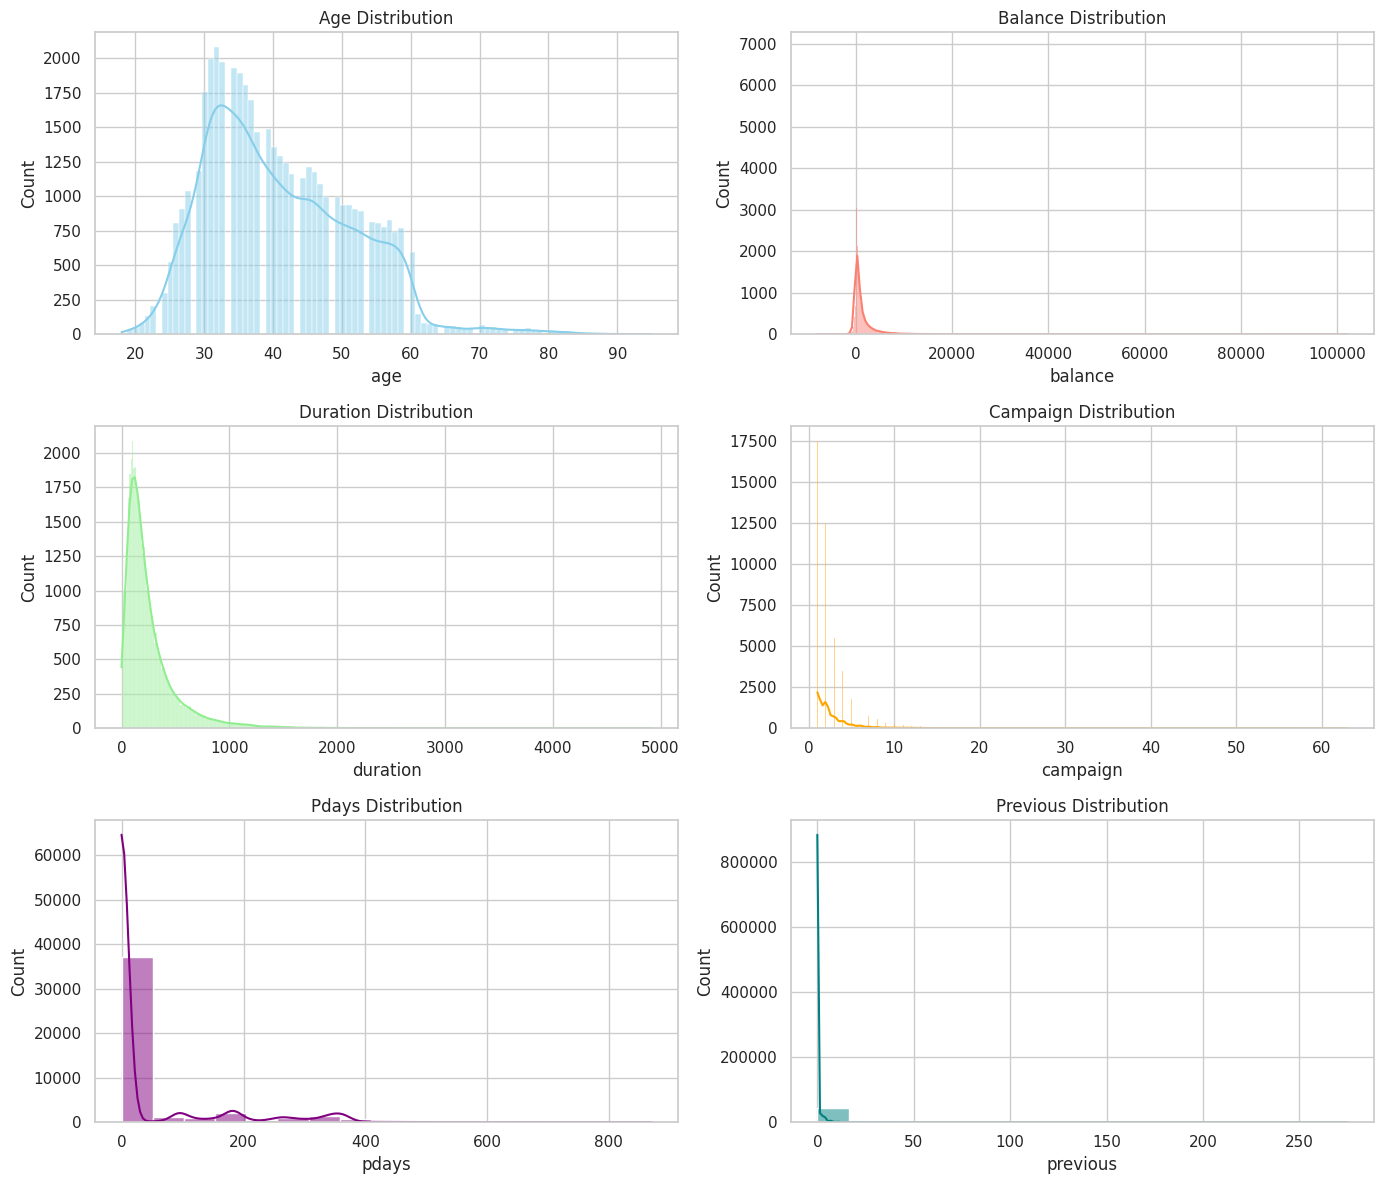

In [19]:
# Set up the visual style
sns.set(style="whitegrid")

# Univariate Analysis - numerical Analysis

fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Age Distribution
sns.histplot(data['age'], kde=True, ax=axes[0,0], color='skyblue')
axes[0,0].set_title("Age Distribution")


# Balance Distribution
sns.histplot(data['balance'], kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Balance Distribution')

# Duration Distribution
sns.histplot(data['duration'], kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Duration Distribution')

# Campaign Distribution
sns.histplot(data['campaign'], kde=True, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Campaign Distribution')

# Pdays Distribution
sns.histplot(data['pdays'], kde=True, ax=axes[2, 0], color='purple')
axes[2, 0].set_title('Pdays Distribution')

# Previous Distribution
sns.histplot(data['previous'], kde=True, ax=axes[2, 1], color='teal')
axes[2, 1].set_title('Previous Distribution')

plt.tight_layout()
plt.show()

The visualizations above provide insights into the distribution of the numerical variables in the dataset:

* **Age Distribution:** The age distribution is approximately normal, with a slight right skew. Most customers are between 30 and 50 years old.
* **Balance Distribution:** The balance distribution is heavily right-skewed, with a long tail towards higher balances. A significant number of customers have low or even negative balances.
* **Duration Distribution:** The duration of the last contact varies widely, with many contacts lasting less than 500 seconds.
* **Campaign Distribution:** Most customers were contacted 1 to 3 times, with very few having been contacted more than 10 times.
* **Pdays Distribution:** The pdays variable shows a large number of customers who were not previously contacted (represented by -1).
* **Previous Distribution:** Most customers had no prior contacts, with very few having been contacted multiple times before.



# Univariate Analysis on Categorical Variables

Let's perform univariate analysis on the categorical variables and then move on to bivariate analysis.

For that we need convert into numeric codes:


In [25]:
# Convert categorical columns to numeric codes
categorical_columns = data.select_dtypes(include=['object']).columns

# Convert each categorical column to numeric codes
data_encoded = data.copy()

for col in categorical_columns:
    data_encoded[col] = data[col].astype('category').cat.codes
    

In [33]:
data_encoded.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


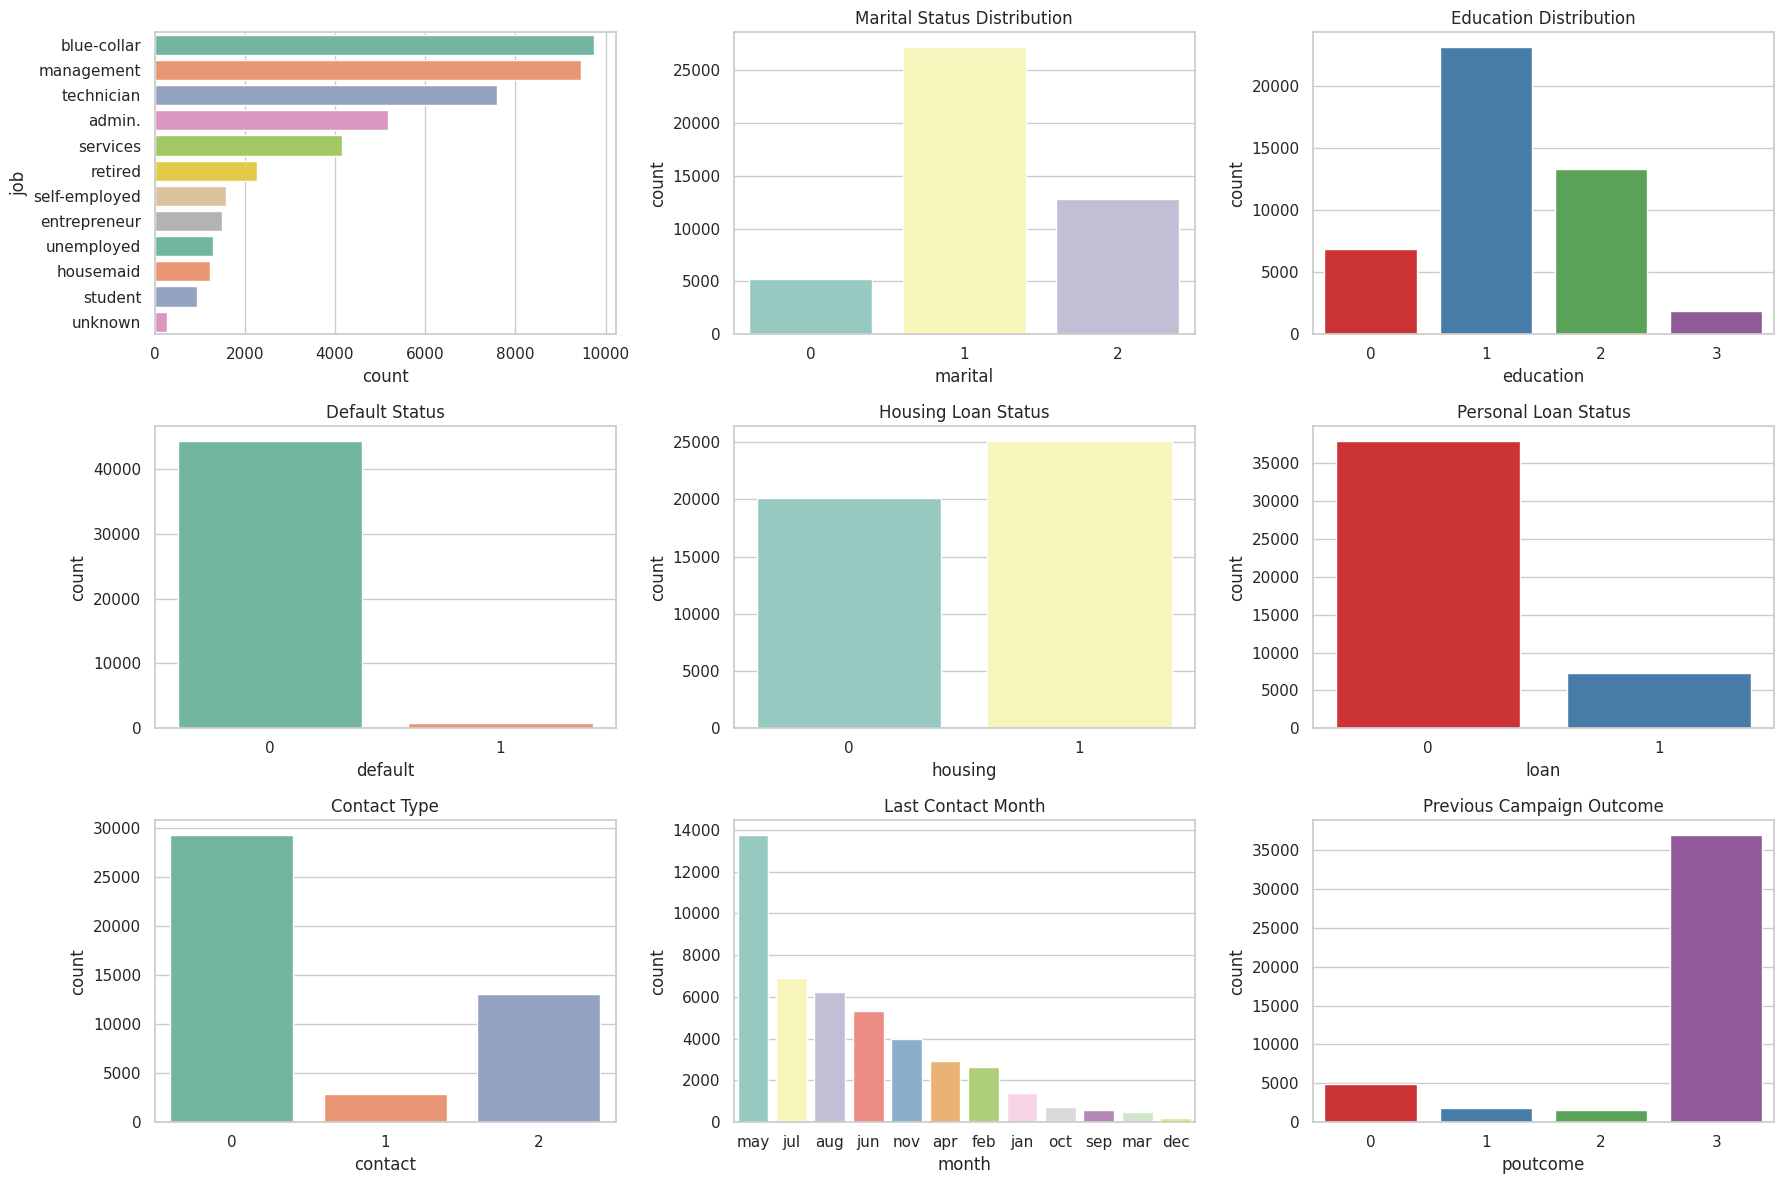

In [43]:
# Univariate Analysis - Categorical Variables
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

# Job Distribution
sns.countplot(y=data['job'], ax=axes[0,0], palette="Set2", order=data['job'].value_counts().index)

# Marital Status Distribution
sns.countplot(x=data_encoded['marital'], ax=axes[0, 1], palette='Set3')
axes[0, 1].set_title('Marital Status Distribution')

# Education Distribution
sns.countplot(x=data_encoded['education'], ax=axes[0, 2], palette='Set1')
axes[0, 2].set_title('Education Distribution')

# Default Distribution
sns.countplot(x=data_encoded['default'], ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Default Status')

# Housing Loan Distribution
sns.countplot(x=data_encoded['housing'], ax=axes[1, 1], palette='Set3')
axes[1, 1].set_title('Housing Loan Status')

# Personal Loan Distribution
sns.countplot(x=data_encoded['loan'], ax=axes[1, 2], palette='Set1')
axes[1, 2].set_title('Personal Loan Status')

# Contact Distribution
sns.countplot(x=data_encoded['contact'], ax=axes[2, 0], palette='Set2')
axes[2, 0].set_title('Contact Type')

# Month Distribution
sns.countplot(x=data['month'], ax=axes[2, 1], palette='Set3', order=data['month'].value_counts().index)
axes[2, 1].set_title('Last Contact Month')

# Previous Outcome Distribution
sns.countplot(x=data_encoded['poutcome'], ax=axes[2, 2], palette='Set1')
axes[2, 2].set_title('Previous Campaign Outcome')

plt.tight_layout()
plt.show()



The categorical variables visualizations provide the following insights:

1. **Job Distribution:** The dataset includes a diverse range of occupations, with the highest number of entries for "blue-collar" jobs, followed by "management" and "technician" roles.
2. **Marital Status:** Most customers are married, followed by single and divorced individuals.
3. **Education:** The majority of customers have secondary education, with a significant number having tertiary education.
4. **Default Status:** The vast majority of customers do not have a credit in default.
5. **Housing Loan Status:** A large number of customers have housing loans.
6. **Personal Loan Status:** Fewer customers have personal loans compared to housing loans.
7. **Contact Type:** The most common contact method is "unknown," followed by "cellular."
8. **Last Contact Month:** The majority of contacts were made in May, followed by August and July.
9. **Previous Campaign Outcome:** Most of the previous campaign outcomes are unknown, with fewer successful outcomes.



# Bivariate Analysis

## Pairplot

Let's see the `pairplot()`.

The **Seaborn Pairplot** allows us to plot pairwise relationships between variables within a data set. This creates a visualization of the data and summarizes a large amount of data into a single figure to make it easier to understand.

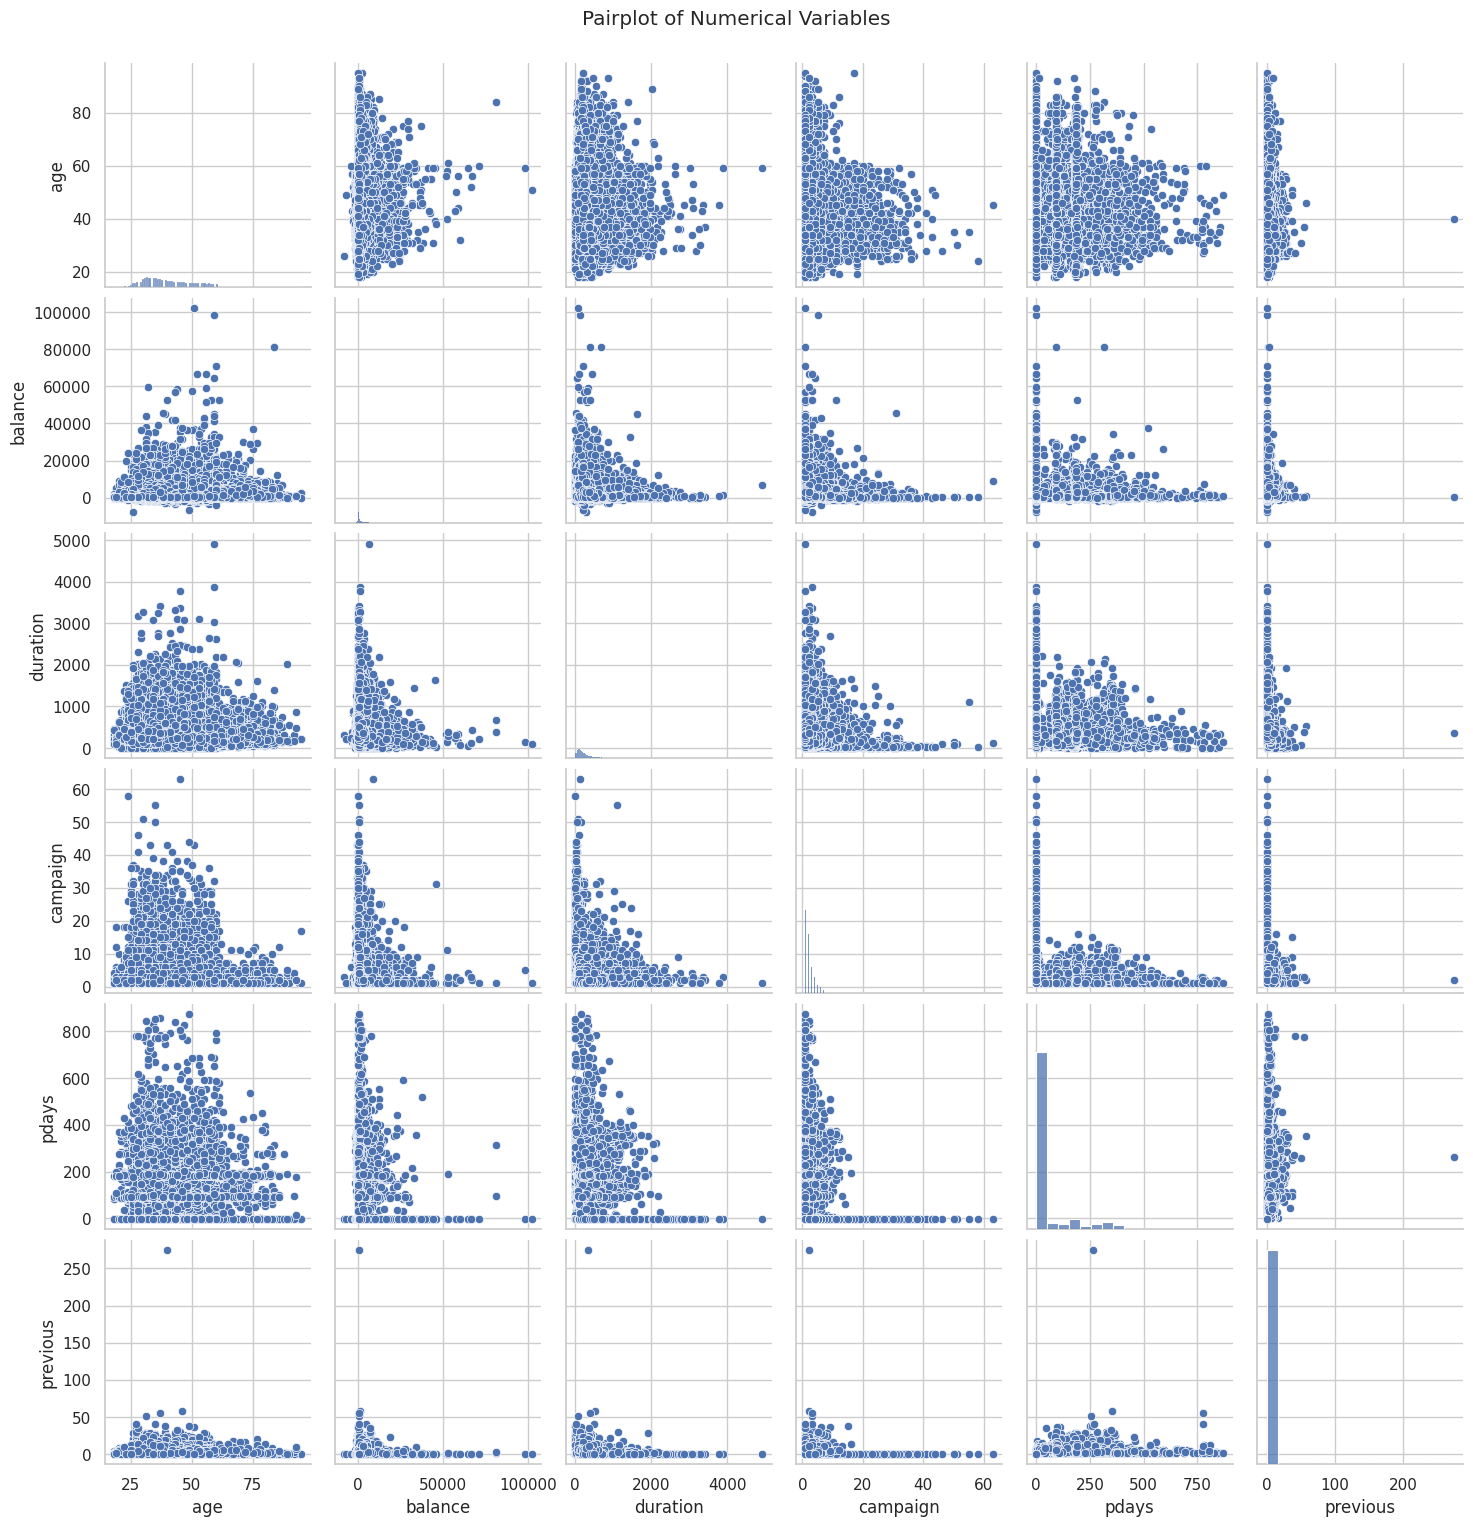

In [65]:
# Pairplot for numerical variables to visualize pairwise relationships
sns.pairplot(data[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()



The pairplot visualizes the pairwise relationships between the numerical variables. Here's a brief interpretation:

- **Balance and Age:** The scatter plot shows a wide range of account balances across different ages, with no strong linear relationship.
- **Duration and Balance:** There's no clear relationship between call duration and account balance, though most data points are concentrated at lower balances.
- **Campaign and Pdays:** There are many outliers, especially for the `pdays` variable, which has a large number of -1 values indicating no previous contact.

## Correlation Matrix

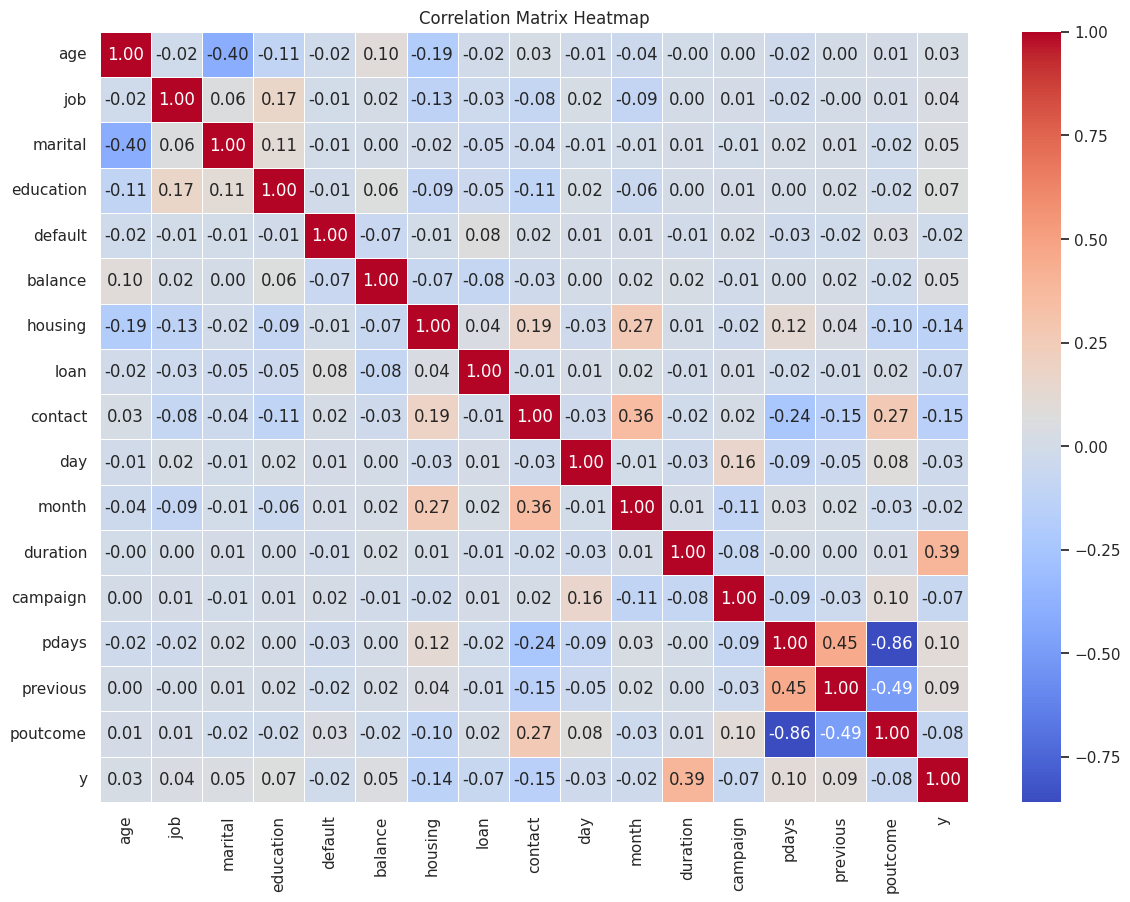

In [46]:
# Generate the correlation matrix
correlation_matrix = data_encoded.corr()

# Plotting the correlation matrix heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

Here is the correlation matrix heatmap for the dataset. This heatmap highlights the strength and direction of the linear relationships between the variables.

**Key Observations:**

* Variables like `duration` and `y` (whether the client subscribed to a term deposit) show a positive correlation.
* Most other variables show weak correlations with each other, which might suggest more complex, non-linear relationships.

# Relation between Age and Balance


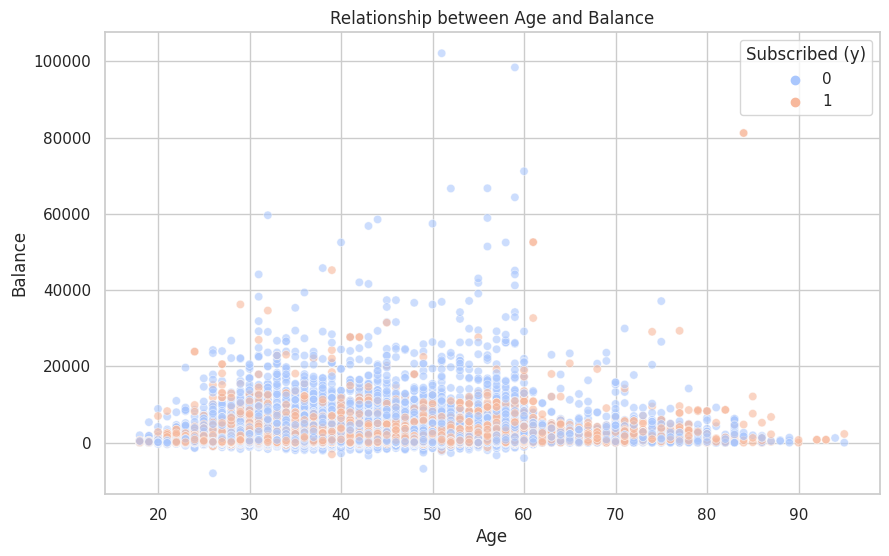

In [48]:
# Visualizing the relationship between age and balance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='balance', data=data_encoded, hue='y', palette='coolwarm', alpha=0.6)
plt.title('Relationship between Age and Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.legend(title='Subscribed (y)', loc='upper right')
plt.show()


The scatter plot above visualizes the relationship between age and balance, with points colored based on whether the client subscribed to a term deposit (`y`).

**Key Observations:**
* There is a wide variation in balance across all ages, with no strong visible trend.
* Most clients with higher balances appear to have subscribed to a term deposit (red markers).


# Can we compare balance across jobs?

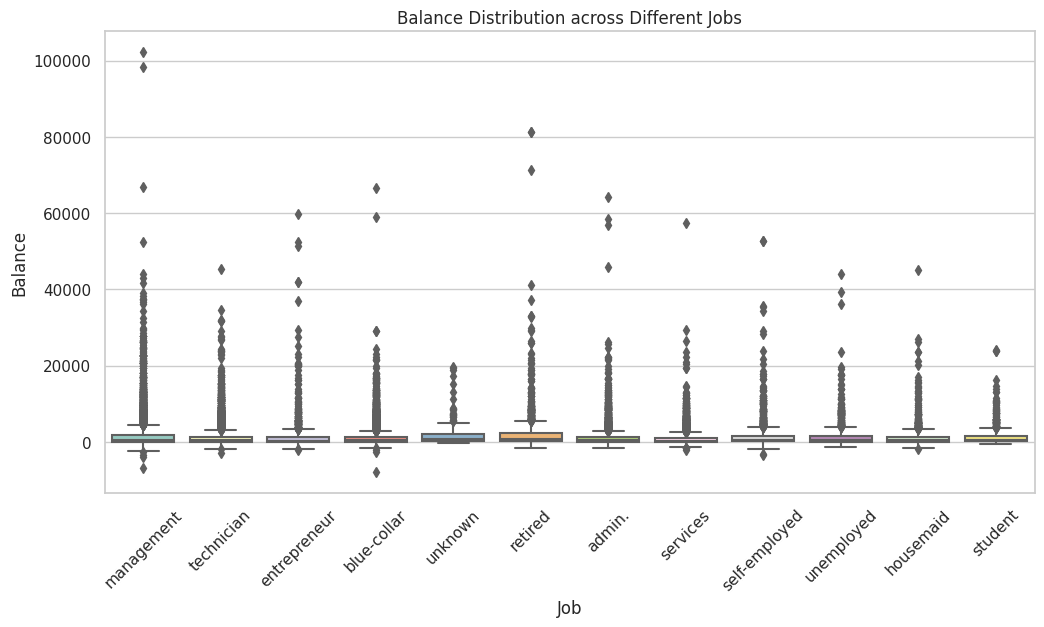

In [55]:
# Map numeric labels back to their string values for the 'job' column
job_mapping = dict(enumerate(data['job'].astype('category').cat.categories))
data_encoded['job_label'] = data_encoded['job'].map(job_mapping)

# Visualizing balance across different job types with string labels
plt.figure(figsize=(12, 6))
sns.boxplot(x='job_label', y='balance', data=data_encoded, palette='Set3')
plt.title('Balance Distribution across Different Jobs')
plt.xlabel('Job')
plt.ylabel('Balance')
plt.xticks(rotation=45)
plt.show()


The boxplot above shows the distribution of balances across different job categories.

### Key Observations:
- **Management and Entrepreneur:** These job categories generally have higher balances compared to others, as seen by the higher median values and wider spread.
- **Blue-Collar and Student:** These categories show lower balances on average, with many outliers indicating some individuals have significantly higher balances.

This visualization helps highlight the variation in balances among different job types. 

# Can we observe how education impacts balance?

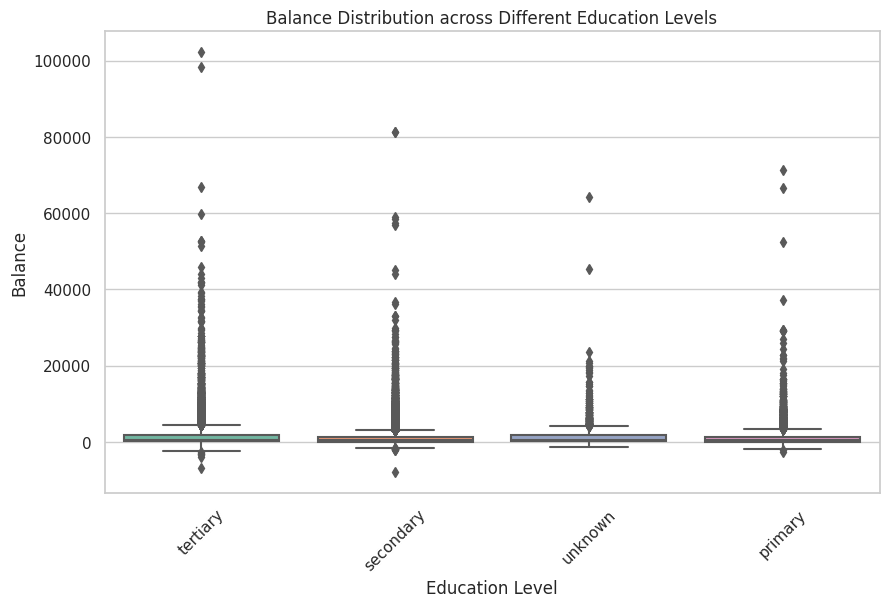

In [57]:
# Map numeric labels back to their string values for the 'education' column
education_mapping = dict(enumerate(data['education'].astype('category').cat.categories))
data_encoded['education_label'] = data_encoded['education'].map(education_mapping)


# Visualizing balance across different education levels
plt.figure(figsize=(10, 6))
sns.boxplot(x='education_label', y='balance', data=data_encoded, palette='Set2')
plt.title('Balance Distribution across Different Education Levels')
plt.xlabel('Education Level')
plt.ylabel("Balance")
plt.xticks(rotation=45)
plt.show()

The boxplot above shows the distribution of balances across different education levels.

### Key Observations:
- **Tertiary Education:** Individuals with tertiary education generally have higher account balances, as indicated by the higher median and wider spread of balances. There are also several outliers with significantly high balances.
- **Secondary Education:** The balance distribution for secondary education is relatively lower compared to tertiary, with a moderate spread of balances.
- **Primary Education and Unknown:** Individuals with primary education or unknown education levels tend to have lower balances, with a smaller spread and fewer outliers.

This suggests that higher education levels are associated with higher account balances on average, which might reflect the income differences typically associated with varying education levels.



# Can we compare balance distribution by marital status?

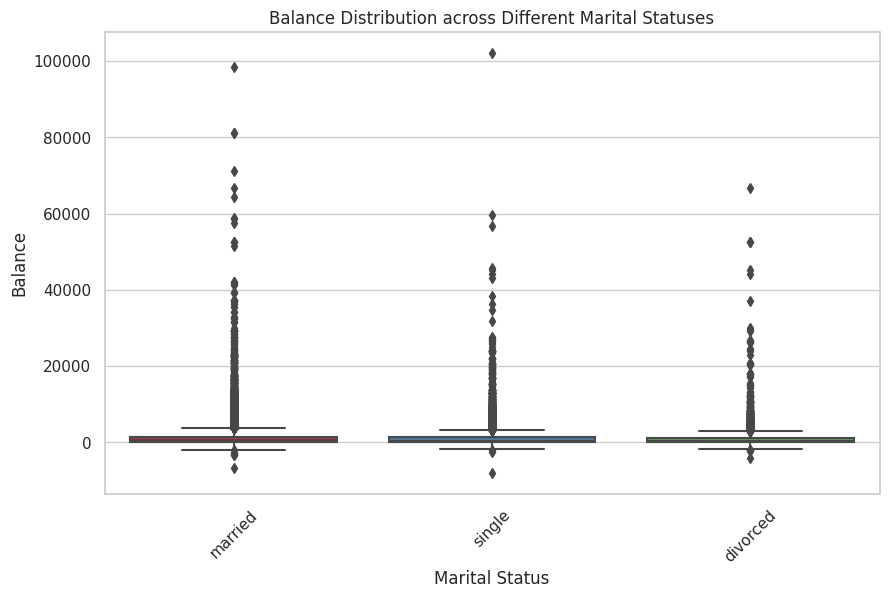

In [59]:
# Map numeric labels back to their string values for the 'marital' column
marital_mapping = dict(enumerate(data['marital'].astype('category').cat.categories))
data_encoded['marital_label'] = data_encoded['marital'].map(marital_mapping)

# Visualizing balance across different marital statuses
plt.figure(figsize=(10, 6))
sns.boxplot(x='marital_label', y='balance', data=data_encoded, palette='Set1')
plt.title('Balance Distribution across Different Marital Statuses')
plt.xlabel('Marital Status')
plt.ylabel('Balance')
plt.xticks(rotation=45)
plt.show()

The boxplot above shows the distribution of balances across different marital statuses.

### Key Observations:
- **Married Individuals:** This group has a higher median balance compared to other groups, with a wide range of balances. There are also several outliers with significantly higher balances.
- **Single Individuals:** The balance distribution for single individuals is slightly lower in terms of median balance, with fewer extreme outliers compared to married individuals.
- **Divorced Individuals:** This group shows a similar pattern to single individuals, but with a slightly lower median balance and a smaller spread.

Overall, married individuals tend to have higher balances, which could reflect different financial behaviors or responsibilities compared to single or divorced individuals.


# How  does loan status affect balance?

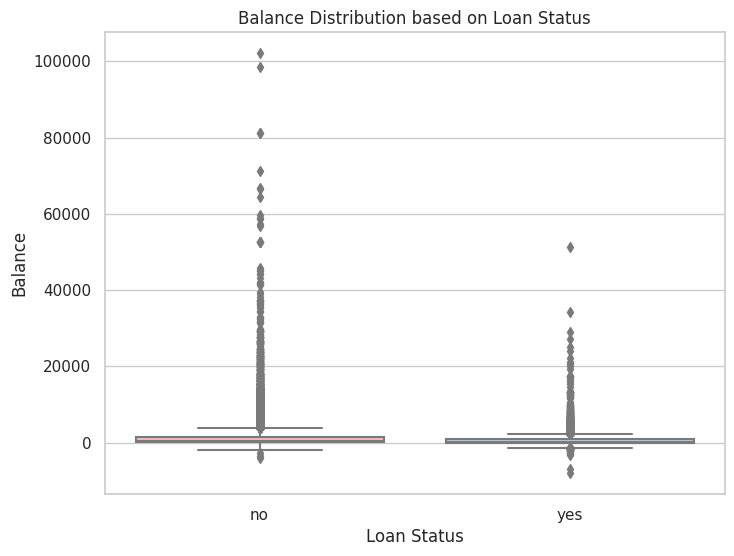

In [60]:
# Map numeric labels back to their string values for the 'loan' column
loan_mapping = dict(enumerate(data['loan'].astype('category').cat.categories))
data_encoded['loan_label'] = data_encoded['loan'].map(loan_mapping)

# Visualizing balance based on loan status
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_label', y='balance', data=data_encoded, palette='Pastel1')
plt.title('Balance Distribution based on Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Balance')
plt.show()


The boxplot above illustrates the distribution of balances based on loan status.

### Key Observations:
- **No Loan:** Individuals without a loan generally have a higher median balance and a broader range of balances. There are also several outliers with significantly high balances.
- **With Loan:** Individuals with a loan tend to have lower balances, with a smaller spread and fewer extreme outliers.

This suggests that having a loan might be associated with lower account balances, possibly due to financial obligations related to loan repayment.


# How does housing loan status impact balance?

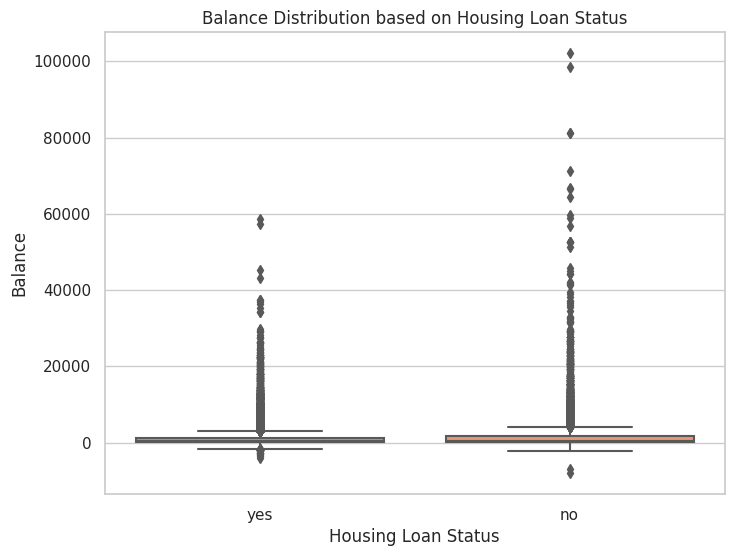

In [61]:
# Map numeric labels back to their string values for the 'housing' column
housing_mapping = dict(enumerate(data['housing'].astype('category').cat.categories))
data_encoded['housing_label'] = data_encoded['housing'].map(housing_mapping)

# Visualizing balance based on housing loan status
plt.figure(figsize=(8, 6))
sns.boxplot(x='housing_label', y='balance', data=data_encoded, palette='Set2')
plt.title('Balance Distribution based on Housing Loan Status')
plt.xlabel('Housing Loan Status')
plt.ylabel('Balance')
plt.show()


The boxplot above shows the distribution of balances based on housing loan status.

### Key Observations:
- **No Housing Loan:** Individuals without a housing loan generally have a higher median balance and a wider spread of balances. There are also several outliers with significantly high balances.
- **With Housing Loan:** Individuals with a housing loan tend to have lower balances on average, with a smaller range and fewer outliers.

This pattern suggests that those without a housing loan might have more available funds in their accounts, whereas those with a housing loan might have lower balances, possibly due to mortgage payments or other related expenses.


# Analyze  Impact of education and loans

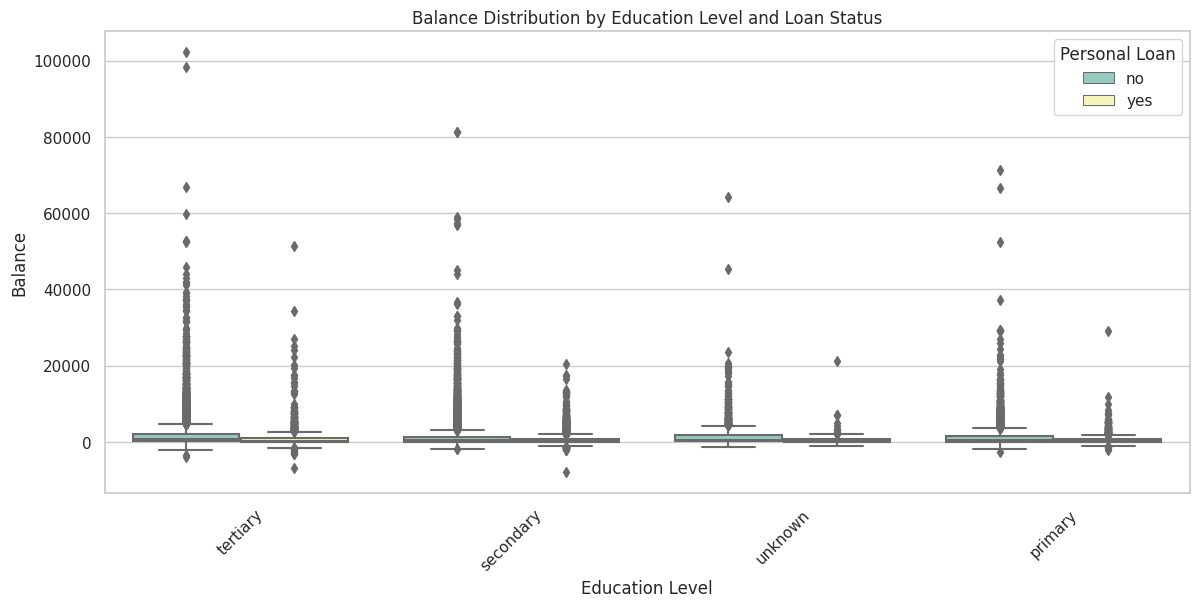

In [62]:
# Visualizing the interaction between education level and loan status on balance
plt.figure(figsize=(14, 6))

# Create a boxplot with hue set to loan status
sns.boxplot(x='education_label', y='balance', hue='loan_label', data=data_encoded, palette='Set3')
plt.title('Balance Distribution by Education Level and Loan Status')
plt.xlabel('Education Level')
plt.ylabel('Balance')
plt.legend(title='Personal Loan')
plt.xticks(rotation=45)
plt.show()


The boxplot above examines the interaction between education level and personal loan status on account balances.

### Key Observations:
- **Tertiary Education:**
  - Individuals with tertiary education tend to have higher balances, regardless of whether they have a personal loan.
  - Those without a loan generally have higher balances than those with a loan, indicating that loan obligations might reduce available balances even among highly educated individuals.

- **Secondary Education:**
  - A similar pattern is observed here, where individuals without a loan tend to have higher balances.
  - The presence of a loan seems to be associated with lower balances across this education group as well.

- **Primary Education and Unknown:**
  - These groups generally have the lowest balances, with those having a loan showing significantly lower balances compared to those without.
  - The impact of having a loan appears to be more pronounced in these groups, potentially due to lower income levels associated with lower education.

### Conclusion:
The analysis suggests that both education level and loan status significantly impact account balances. Higher education is associated with higher balances, and the presence of a loan tends to reduce balances across all education levels.


# How do balance and loan status interact by marital status?



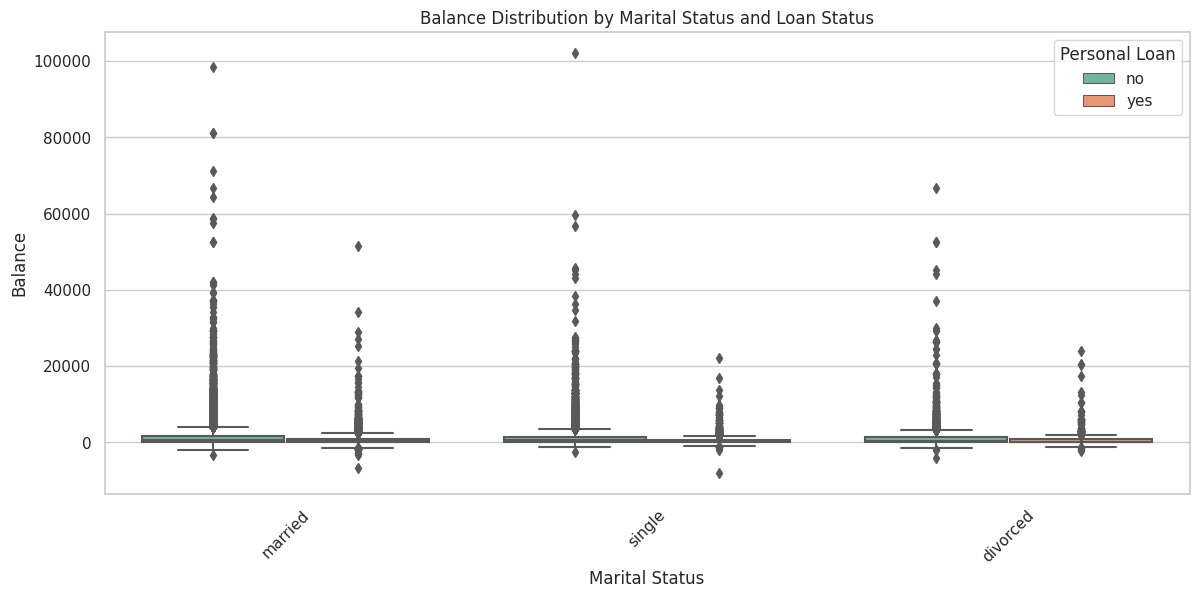

In [63]:
# Visualizing the interaction between marital status and loan status on balance
plt.figure(figsize=(14, 6))

# Create a boxplot with hue set to loan status
sns.boxplot(x='marital_label', y='balance', hue='loan_label', data=data_encoded, palette='Set2')
plt.title('Balance Distribution by Marital Status and Loan Status')
plt.xlabel('Marital Status')
plt.ylabel('Balance')
plt.legend(title='Personal Loan')
plt.xticks(rotation=45)
plt.show()


The boxplot above illustrates the interaction between marital status and personal loan status on account balances.

### Key Observations:
- **Married Individuals:**
  - Married individuals without a loan generally have higher balances compared to those with a loan.
  - The presence of a loan tends to reduce the balances significantly, though married individuals still tend to have higher balances compared to other marital statuses.

- **Single Individuals:**
  - Single individuals without a loan have relatively higher balances, but the gap between those with and without a loan is narrower compared to married individuals.
  - The impact of having a loan is still visible, with lower balances for those with a loan.

- **Divorced Individuals:**
  - Divorced individuals tend to have lower balances overall.
  - Similar to the other groups, those without a loan have higher balances compared to those with a loan, although the difference is less pronounced.

### Conclusion:
Marital status interacts with loan status in affecting account balances. Married individuals generally maintain higher balances, but having a loan significantly reduces balances across all marital statuses. The impact of a loan is most pronounced among married individuals.

# Analyze impact of housing loan and marital status. 

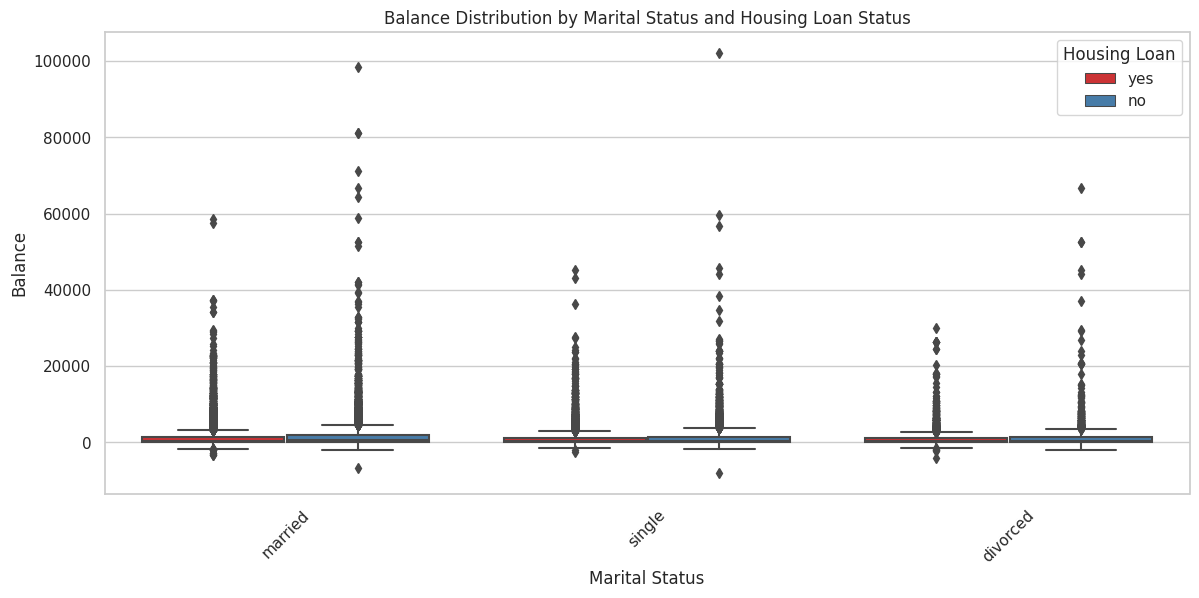

In [64]:
# Visualizing the interaction between marital status and housing loan status on balance
plt.figure(figsize=(14, 6))

# Create a boxplot with hue set to housing loan status
sns.boxplot(x='marital_label', y='balance', hue='housing_label', data=data_encoded, palette='Set1')
plt.title('Balance Distribution by Marital Status and Housing Loan Status')
plt.xlabel('Marital Status')
plt.ylabel('Balance')
plt.legend(title='Housing Loan')
plt.xticks(rotation=45)
plt.show()


The boxplot above explores the interaction between marital status and housing loan status on account balances.

### Key Observations:
- **Married Individuals:**
  - Married individuals without a housing loan generally have higher balances than those with a housing loan.
  - The difference in balances between those with and without a housing loan is significant, suggesting that housing loans may have a substantial impact on available balances.

- **Single Individuals:**
  - Single individuals without a housing loan also tend to have higher balances, though the gap between those with and without a housing loan is narrower compared to married individuals.
  - The overall balance levels are lower than those of married individuals.

- **Divorced Individuals:**
  - Divorced individuals show a similar trend, with those without a housing loan having higher balances.
  - The impact of having a housing loan on balances is less pronounced in this group, but balances are still generally lower compared to the other marital statuses.

### Conclusion:
Housing loans appear to reduce balances across all marital statuses, with married individuals showing the most significant impact. Single and divorced individuals also experience lower balances with a housing loan, but the difference is not as stark.


# Build Machine Learning Model

Let's build machine learning model to predict whether the customer will subscribe for bank deposit or not?



To build a machine learning model to predict whether a customer will subscribe to a bank deposit (`y` column), we'll follow these steps:

1. **Data Preprocessing:**
   - Handle categorical variables (encoding).
   - Split the data into training and testing sets.
   - Feature scaling (if necessary).

2. **Model Selection:**
   - Choose a classification algorithm (e.g., Logistic Regression, Decision Tree, Random Forest, etc.).

3. **Model Training:**
   - Train the selected model on the training data.

4. **Model Evaluation:**
   - Evaluate the model using appropriate metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).

5. **Model Interpretation:**
   - Analyze feature importance and model predictions.



### Understanding the Data:

The dataset you provided relates to a direct marketing campaign of a Portuguese banking institution. The marketing campaign involved contacting potential customers, usually via phone calls, to ask if they would subscribe to a term deposit.

### Key Characteristics of the Data:
- **Target Variable:** `y` - whether the customer subscribed to a term deposit (`yes` or `no`).
- **Features:** The dataset includes various features that can be categorized into:
  - **Demographic:** Age, job, marital status, education, etc.
  - **Economic:** Balance in the account.
  - **Previous Contacts:** Information about previous contacts, such as `duration`, `campaign`, `pdays`, etc.
  - **Current Campaign Information:** Contact type, last contact day, month, etc.

### Suitable Models for this Data:
1. **Binary Classification Models:** Since the target variable is binary (yes or no), models like Logistic Regression, Support Vector Machines (SVM), and Random Forests are appropriate.
2. **Why Logistic Regression?**
   - It’s simple, interpretable, and works well when the relationship between the features and the target is linear.
3. **Why Random Forest?**
   - It’s robust, handles non-linear relationships, and provides insights into feature importance.

### Data Preprocessing Explained:
1. **Label Encoding:**
   - **Why?** The dataset contains categorical features (like job, marital status, etc.) that are non-numeric. Most machine learning algorithms require numerical inputs, so label encoding converts these categorical values into numerical labels.
   - **How?** Each category is assigned a unique integer.

2. **Standard Scaling:**
   - **Why?** Features like balance and duration can have different ranges. Standard scaling ensures that each feature contributes equally to the model by normalizing the data to have a mean of 0 and a standard deviation of 1.
   - **How?** It subtracts the mean and scales to unit variance.


Let's start with `Logistic Regresssion` model.

In [96]:
np.unique(data['y'].values)

array(['no', 'yes'], dtype=object)

In [102]:
data_new = data.copy() # copy to new dataframe

# Data Preprocessing
label_encoders = {}
for column in data_new.select_dtypes(include=['object']).columns:
    if column != 'y':
        le = LabelEncoder()
        data_new[column] = le.fit_transform(data_new[column])
        label_encoders[column] = le
    


In [105]:
np.unique(data_new['y'].values)

array([0, 1])

In [104]:
# Encode the target variable
data_new['y'] = data_new['y'].apply(lambda x: 0 if x == 'no' else 1)

# Split the data into training and testing sets
X = data_new.drop('y', axis=1)
y = data_new['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Logistic Regression and Feature Importance:
- Logistic Regression provides coefficients that can be interpreted as the importance of features. These coefficients indicate how much each feature contributes to the decision boundary.

Let's implement a Logistic Regression model and visualize the feature importance, then compare it with the Random Forest model.

In [106]:
# Train a Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [109]:
# Calculate the logistic regression model 
y_pred_lr = log_reg.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
classification_rep_lr = classification_report(y_test, y_pred_lr)

print(accuracy_lr)
print(classification_rep_lr)

0.891108817457977
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11977
           1       0.59      0.22      0.32      1587

    accuracy                           0.89     13564
   macro avg       0.75      0.60      0.63     13564
weighted avg       0.87      0.89      0.87     13564



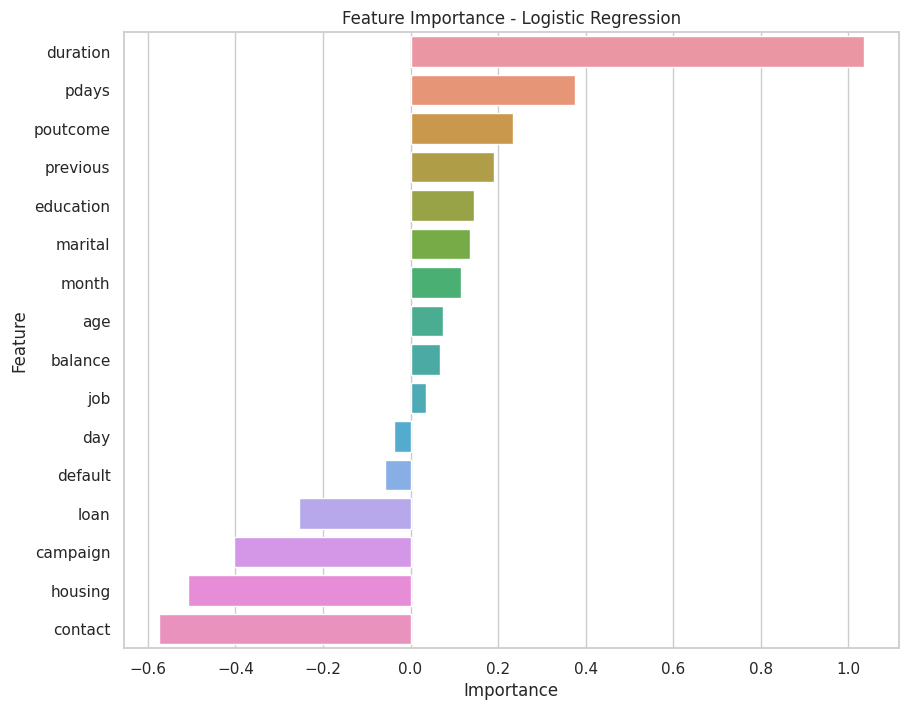

In [110]:
# Get the coefficients (feature importance) from the Logistic Regression model
feature_importance_lr = log_reg.coef_[0]
# Visualize feature importance for Logistic Regression
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance_lr
}).sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - Logistic Regression')
plt.show()



### Logistic Regression Results:

- **Accuracy:** The Logistic Regression model achieved an accuracy of **89.11%** on the test set.
- **Classification Report:**
  - **Precision for class 0 (No subscription):** 0.90
  - **Recall for class 0:** 0.98
  - **F1-score for class 0:** 0.94
  - **Precision for class 1 (Subscription):** 0.59
  - **Recall for class 1:** 0.22
  - **F1-score for class 1:** 0.32

### Feature Importance in Logistic Regression:
The bar plot visualizes the importance of features in the Logistic Regression model. Features with higher absolute values of coefficients are considered more important in predicting whether a customer will subscribe to a bank deposit.



Now let's do the same with **Random Forest Classifier.**

In [111]:


# Model Selection and Training - Random Forest Clasfifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model Evaluation 
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(accuracy)
print(classification_rep)
print(conf_matrix)

0.9048215865526393
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11977
           1       0.65      0.40      0.50      1587

    accuracy                           0.90     13564
   macro avg       0.79      0.69      0.72     13564
weighted avg       0.89      0.90      0.89     13564

[[11633   344]
 [  947   640]]



### Model Evaluation Results:

- **Accuracy:** The model achieved an accuracy of **90.48%** on the test set.
  
- **Classification Report:**
  - **Precision for class 0 (No subscription):** 0.92
  - **Recall for class 0:** 0.97
  - **F1-score for class 0:** 0.95
  - **Precision for class 1 (Subscription):** 0.65
  - **Recall for class 1:** 0.40
  - **F1-score for class 1:** 0.50

- **Confusion Matrix:**
  - **True Negatives (TN):** 11,633
  - **False Positives (FP):** 344
  - **False Negatives (FN):** 947
  - **True Positives (TP):** 640

### Interpretation:
- The model performs well in predicting customers who do not subscribe to the bank deposit (class 0).
- However, it struggles with predicting customers who do subscribe (class 1), as indicated by the lower recall and F1-score for class 1. This is likely due to class imbalance, where there are more customers who do not subscribe than those who do.



### Comparison with Logistic Regression:
- **Accuracy Comparison:**
  - Logistic Regression: 89.11%
  - Random Forest: 90.48%

- **Recall for class 1 (Subscription):**
  - Logistic Regression: 0.22
  - Random Forest: 0.40

The Random Forest model performs better in terms of recall for class 1, meaning it is better at identifying customers who will subscribe to the deposit.

### Conclusion:
- **Logistic Regression** is simpler and interpretable, with coefficients directly indicating feature importance.
- **Random Forest** is more complex but provides better performance, especially in handling the class imbalance and identifying subscribers.



### Next Steps:
- **Improvement Strategies:**
  - **Class Balancing:** Techniques like SMOTE or class weighting to address imbalance.
  - **Model Tuning:** Hyperparameter tuning using Grid Search or Random Search.
  - **Trying Different Models:** Using other algorithms like XGBoost, SVM, or ensemble methods.

